In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [23]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/2988906437.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/2988906437.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/2988906437.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/2988906437.py:5: FutureWarning: Passing lite

In [24]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time
0,Cora,0.1,42,0.9256,0.9345,58.07
1,Cora,0.1,43,0.9651,0.9657,57.52
2,Cora,0.1,44,0.9109,0.9182,58.48
3,Cora,0.1,45,0.9155,0.9145,63.42
4,Cora,0.1,46,0.9008,0.8919,59.46
5,Cora,0.1,47,0.9550,0.9567,56.34
6,Cora,0.1,48,0.9431,0.9469,60.26
7,Cora,0.1,49,0.8880,0.8989,61.46
8,Cora,0.1,50,0.9467,0.9519,59.04
9,Cora,0.1,51,0.9559,0.9556,58.83


In [25]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df.groupby(['dataset', 'split_ratio']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                 AP          
                        mean       std     mean       std
dataset split_ratio                                      
Cora    0.1          0.93066  0.026215  0.93348  0.026046
        0.2          0.92393  0.020322  0.92136  0.024127
        0.3          0.93879  0.013738  0.93789  0.014508
        0.4          0.93196  0.011277  0.92811  0.012380
        0.5          0.92156  0.014187  0.91642  0.021716

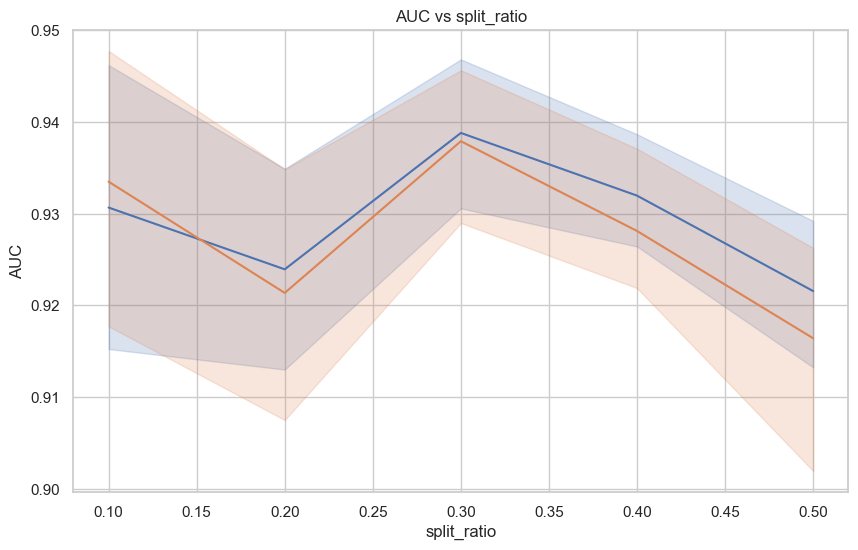

In [30]:
# plot lineplot  the mean AUC and AP for each split_ratio
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='split_ratio', y='AUC')
sns.lineplot(data=df, x='split_ratio', y='AP')
plt.title('AUC vs split_ratio')
plt.show()


In [31]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [33]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
             mean       std      mean       std
dataset                                        
Cora     0.880982  0.011835  0.878855  0.012996